In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Compare the % of the renewable energy for each countries that user input**


In [ ]:
country_renew_data = pd.read_csv('./datasets/clean_renewables_1985_2021_only_countries.csv')
region_renew_data = pd.read_csv('./datasets/clean_renewables_1985_2021_region.csv')

# Preview the countries in the dataset
all_countries = country_renew_data['Entity'].unique()
all_countries = np.sort(all_countries)

# Preview the regions in the dataset
all_regions = region_renew_data['Entity'].unique()
all_regions = np.sort(all_regions)


Available regions:
 Africa, Africa (BP), Asia, Asia Pacific (BP), Central America (BP), Eastern Africa (BP), Europe, Europe (BP), European Union (27), High-income countries, Lower-middle-income countries, Middle Africa (BP), Middle East (BP), Non-OECD (BP), North America, North America (BP), OECD (BP), Oceania, South America, South and Central America (BP), Upper-middle-income countries, Western Africa (BP)


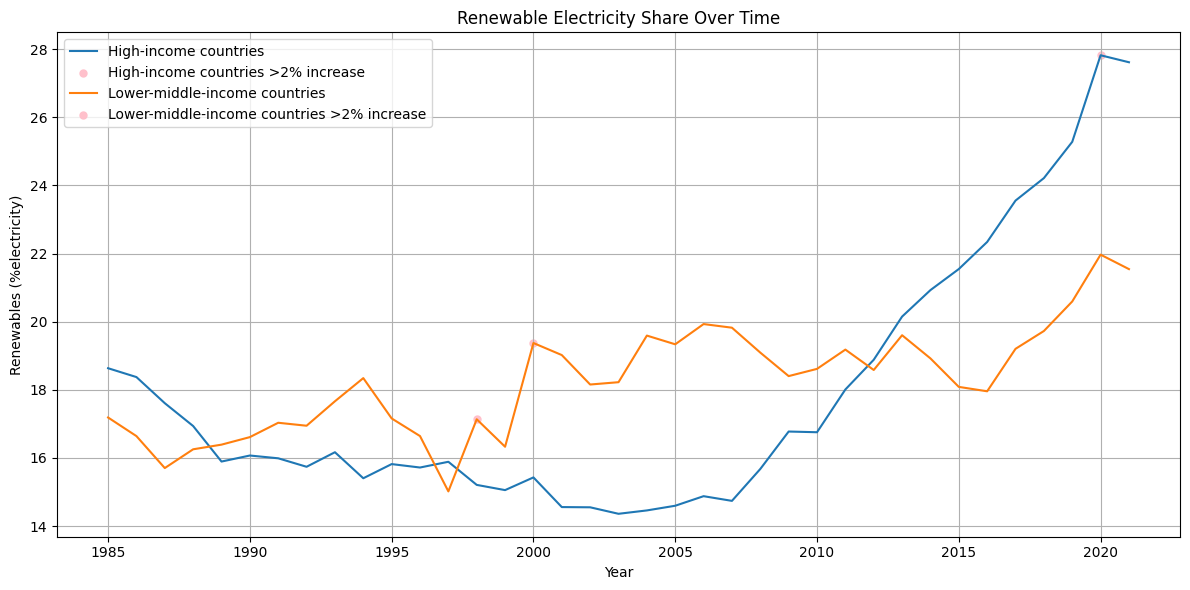

Years with >2% increase in renewable electricity share:
High-income countries: [2020]
Lower-middle-income countries: [1998 2000]


In [ ]:
# user input to select a country or region
Selected_Entity = input("Please select a country or region to compare (C or R): \n")

if Selected_Entity == 'C':
    # user input to select a country
    print("Available countries:\n", ", ".join(all_countries))
    user_input = input("Please enter a country to compare(separated by commas): ")
    selected_countries = [country.strip() for country in user_input.split(',')]

    for country in selected_countries:
        if country not in all_countries:
            print(f"{country} is not in the dataset. Please check the spelling or try another country.")
            exit()

    # Filter the data for the selected country
    selected_countries_data = country_renew_data[country_renew_data['Entity'].isin(selected_countries)]
    
    # Plotting the data for the selected country
    plt.figure(figsize=(12, 6))
    highlighted_years = {} # List to store years with >3% increase

    for country in selected_countries:
        country_data = selected_countries_data[selected_countries_data['Entity'] == country].sort_values(by='Year')
        y_col = 'Renewables (%electricity)'

        # Calculate year-over-year change
        country_data['Change'] = country_data[y_col].diff()
        
        # Identify years with >3% increase
        significant = country_data[country_data['Change'] > 3]
        highlighted_years[country] = significant[['Year', y_col]]

        # Line plot
        plt.plot(country_data['Year'], country_data[y_col], label=country)

        # Highlight significant jumps
        plt.scatter(significant['Year'], significant[y_col], color='red', s=25, label=f'{country} >3% increase')

    plt.xlabel('Year')
    plt.ylabel('Renewables (%electricity)')
    plt.title('Renewable Electricity Share Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print the years with >3% increase for each country
    highlighted_years_str = '\n'.join([f"{country}: {years['Year'].values}" for country, years in highlighted_years.items()])
    print(f"Years with >3% increase in renewable electricity share:\n{highlighted_years_str}")

elif Selected_Entity == 'R':
    # user input to select a region
    print("Available regions:\n", ", ".join(all_regions))
    user_input = input("Please enter a region to compare(separated by commas): ")
    selected_regions = [region.strip() for region in user_input.split(',')]

    for region in selected_regions:
        if region not in all_regions:
            print(f"{region} is not in the dataset. Please check the spelling or try another region.")
            exit()

    # Filter the data for the selected region
    selected_regions_data = region_renew_data[region_renew_data['Entity'].isin(selected_regions)]
    

    # Plotting the data for the selected region

    plt.figure(figsize=(12, 6))
    highlighted_years = {} # List to store years with >2% increase

    for region in selected_regions:
        region_data = selected_regions_data[selected_regions_data['Entity'] == region].sort_values(by='Year')
        y_col = 'Renewables (%electricity)'

        region_data['Change'] = region_data[y_col].diff()

        significant = region_data[region_data['Change'] > 2]
        highlighted_years[region] = significant[['Year', y_col]]

        plt.plot(region_data['Year'], region_data['Renewables (%electricity)'], label=region)

        plt.scatter(significant['Year'], significant[y_col], color='red', s=25, label=f'{region} >2% increase')

    plt.xlabel('Year')
    plt.ylabel('Renewables (%electricity)')
    plt.title('Renewable Electricity Share Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    highlighted_years_str = '\n'.join([f"{region}: {years['Year'].values}" for region, years in highlighted_years.items()])
    print(f"Years with >2% increase in renewable electricity share:\n{highlighted_years_str}")

else:
    print("Invalid input. Please enter 'C' for country or 'R' for region.")
    exit()
    
